In [471]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler, RobustScaler

# **Import and understand data**

In [472]:
# Read data from csv file
data = pd.read_csv("data/creditcard.csv")

In [473]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [474]:
# Check shape and data summary
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271

In [475]:
# check all the columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [476]:
# Determin number of fraud cases and plot

fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]

print(f"Total Fraud Count: {len(fraud)} ")
print(f"Non Fraud Transaction: {len(valid)}")
print(f"Fraction of fraud and non fraud: {len(fraud)/ len(valid)}")

Total Fraud Count: 492 
Non Fraud Transaction: 284315
Fraction of fraud and non fraud: 0.0017304750013189597


Text(0, 0.5, 'Number of Transactions')

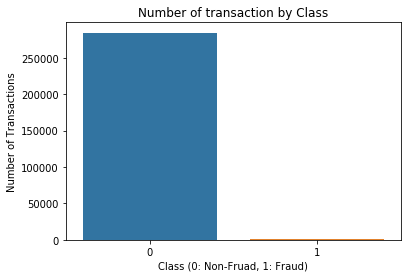

In [477]:
# Plot the difference
tmp = data.groupby("Class")['Amount'].count()

# Convert Series to DataFrame and reset index to make 'Class' a column
fraud_count = pd.DataFrame(tmp).reset_index()

sns.barplot(data= fraud_count,x="Class" ,y= "Amount" )
plt.title("Number of transaction by Class")
plt.xlabel("Class (0: Non-Fruad, 1: Fraud)")
plt.ylabel('Number of Transactions')


In [478]:

print(f"Fraction of fraud : {len(fraud)/ len(data)}")

Fraction of fraud : 0.001727485630620034


- Only **0.17%** fraudulent transaction out all the transactions. The data is highly **Unbalanced**.

In [479]:
# Let's check the amount details for Fraud Transaction
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [480]:
# Let's check the amount details for Valid Transaction
print("Amount details of the fraudulent transaction")
valid.Amount.describe()

Amount details of the fraudulent transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

-  The average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

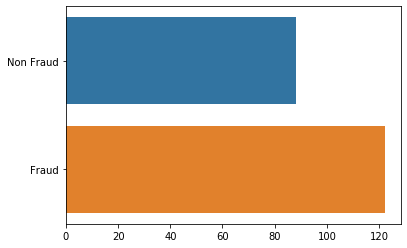

In [481]:
sns.barplot(x=[valid.Amount.describe()[1], 
               fraud.Amount.describe()[1]], y = ['Non Fraud', 'Fraud'])

- Most of the transactions are non-fraud. If we use this data to train our models, the algorithms will probably overfit since it assume most transactions are not fraud. There are 284315 non fraud transactions and only 492 fraud transactions.

# Scaling

- Before choosing between Standard Scaler and Robust Scaler, we will check the distribution of Amount and Time

Text(0.5, 1.0, 'Distribution of amount')

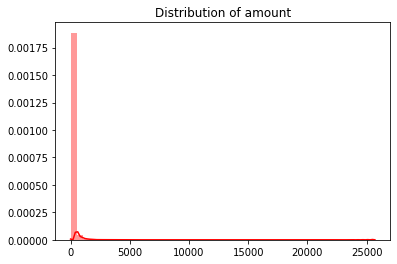

In [482]:
# Amount distribution plot

amount_arr = data['Amount'].values
sns.distplot(amount_arr, color = 'r')
plt.title("Distribution of amount")

Text(0.5, 1.0, 'Distribution of time')

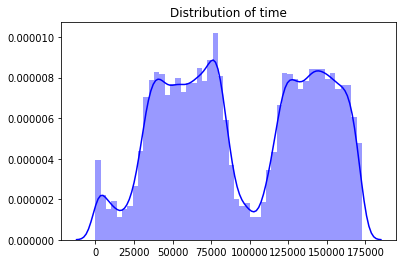

In [483]:
# Time distribution plot
time_arr = data['Time'].values
sns.distplot(time_arr, color = 'b')
plt.title("Distribution of time")

- We can observe that the distributition of amount is skewed and both distribitions do not follow normal distribution => Using robust scaler instead of Standard scaler since robust scaler is less sensitive with outlier

- Since the data has already scaled V1 - V28 beside Time and Amount. We will scale Time and Amount variables

In [484]:
scaler = RobustScaler()

#convert 1-dimensional array shape (n, ) into 2 dim array with shape(n, 1)
scale_amt = data['Amount'].values.reshape(-1, 1)
scale_time = data['Time'].values.reshape(-1, 1)
data['scaled_amount'] = scaler.fit_transform(scale_amt)
data['scaled_time'] = scaler.fit_transform(scale_time)

#Drop the two unscaled columns
data = data.drop(columns=['Time', 'Amount'])

In [485]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


- Data is now scaled.

In [486]:
from sklearn.model_selection import StratifiedKFold


- Since the distribution of the data is skewed (with many more valid transactions than fraudulent ones), we use Stratified Sampling to maintain the same class distribution across the different folds in both the training and testing sets.

- https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/


In [487]:
X = data.drop(columns="Class")
y = data['Class']


# Split into ten folds
folds = StratifiedKFold(n_splits= 5, random_state=None, shuffle= False)

for train_index, test_index in folds.split(X,y):
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    #Check distribution of ytrain and ytest for each fold
    print("Label distribution of train set:")
    tmp = np.unique(original_ytrain.values, return_counts=True)[1]
    print(tmp/ len(original_ytrain))
    print("\n Label distribution of test set:")
    tmp2 = np.unique(original_ytest.values, return_counts=True)[1]
    print(tmp2/ len(original_ytest))
    print("---"*10)
    

Label distribution of train set:
[0.99827514 0.00172486]

 Label distribution of test set:
[0.998262 0.001738]
------------------------------
Label distribution of train set:
[0.99827514 0.00172486]

 Label distribution of test set:
[0.998262 0.001738]
------------------------------
Label distribution of train set:
[0.99827076 0.00172924]

 Label distribution of test set:
[0.99827952 0.00172048]
------------------------------
Label distribution of train set:
[0.99827076 0.00172924]

 Label distribution of test set:
[0.99827952 0.00172048]
------------------------------
Label distribution of train set:
[0.99827076 0.00172924]

 Label distribution of test set:
[0.99827952 0.00172048]
------------------------------


- This follow the distribution of the dataset.

# NearMiss (Under sampling Technique)

- Due to the **significant class imbalance** in the dataset, machine learning techniques like Decision Trees and Logistic Regression tend to be **biased** towards the majority class. 

- As a result, these models are more likely to predict **transactions as valid rather than fraudulent**, simply because valid transactions dominate the dataset.

In [488]:
# Let's try to fit logistic regression with the imbalance data 
#using stratisfied K fold Validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

- NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples.

- Sources: https://www.researchgate.net/profile/Rahul-Pandya-7/publication/367510232_Heuristic_Approach_of_Over-Sampling_and_Under-_Sampling_in_Fraud_Detection/links/63d54b2d64fc860638f55f64/Heuristic-Approach-of-Over-Sampling-and-Under-Sampling-in-Fraud-Detection.pdf

In [489]:
# Initialize lists to store the metrics for each fold

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

#Iterate through the folds

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #Init logistic regression model
    model = LogisticRegression(max_iter=10000)
    
    #Train the model
    model.fit(X_train, y_train)
    
    #Predict on the test_set
    y_pred = model.predict(X_test)
    
    #Calculate and store metrics for each fold
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Calculate the average of each metric
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')

Average Accuracy: 0.9991
Average Precision: 0.8850
Average Recall: 0.5992
Average F1 Score: 0.6993


- Even though the average accuracy is very high, recall accuracy is not really great. 

**Recall Formula:**
Recall = TP / (TP + FN)

where:
    TP = True Positive
    FN = False Negative

- Also known as sensitivity or true positive rate, is used to measure ability of a model to correctly identify positive instances

- **Low Recall Score** means that the number of **false negatives is high**, which implies that many fraudulent transactions are considered as valid transactions.

In [490]:
# Apply near miss technique

In [491]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_miss, y_miss = nr.fit_resample(X, y.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_miss == 0)))

Before Undersampling, counts of label '1': 492
Before Undersampling, counts of label '0': 284315 

After Undersampling, the shape of train_X: (984, 30)
After Undersampling, the shape of train_y: (984,) 

After Undersampling, counts of label '1': 492
After Undersampling, counts of label '0': 492


- Now we have same ratio of fraud and non fraud transactions!

In [492]:
# We need to convert y from numpy array type to series type to run the code below
y_miss = pd.Series(y_miss)

In [493]:
# Initialize lists to store the metrics for each fold

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

#Iterate through the folds

for train_index, test_index in folds.split(X_miss, y_miss):
    X_train, X_test = X_miss.iloc[train_index], X_miss.iloc[test_index]
    y_train, y_test = y_miss.iloc[train_index], y_miss.iloc[test_index]
    
    #Init logistic regression model
    model = LogisticRegression(max_iter=10000)
    
    #Train the model
    model.fit(X_train, y_train)
    
    #Predict on the test_set
    y_pred = model.predict(X_test)
    
    #Calculate and store metrics for each fold
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Calculate the average of each metric
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')

Average Accuracy: 0.9187
Average Precision: 0.9677
Average Recall: 0.8657
Average F1 Score: 0.9132


- We increase the Recall score from 0.6 to 0.86 just by undersampling !

# Correlation Matrix

- Let's see if we can further improve the accuracy of the model by eliminating outliers from important features.

In [494]:
# Create a new dataframe from Undersampling

df_new = pd.concat([X_miss, y_miss], axis = 1)
# Rename newly added column
df_new.rename(columns={0 : 'Label'}, inplace = True)
df_new.head(), df_new.shape

(         V1        V2        V3        V4        V5        V6        V7  \
 0  1.927638  1.320291 -2.600122  3.933076  1.953219  0.034466  0.680236   
 1  1.871702  1.106509 -1.876864  4.064366  1.334907  0.118505  0.288013   
 2 -0.465511  1.293542  0.909931  0.805013  0.329358 -1.316649  0.877948   
 3 -0.272513  1.275378  0.814107  0.731147  0.461421 -1.122808  0.866315   
 4 -0.425745  1.379091  0.645260  0.697394  0.702898 -0.681755  0.816204   
 
          V8        V9       V10  ...       V22       V23       V24       V25  \
 0 -0.061683 -1.618814  0.328515  ... -0.371098  0.013208 -0.049736  0.283204   
 1  0.079950 -1.215343  0.372612  ... -0.366767  0.143651  0.385827  0.046612   
 2 -0.202594 -0.542755 -0.870288  ...  0.129026 -0.145944  0.586362  0.206361   
 3 -0.134538 -0.566607 -0.976048  ...  0.047025 -0.264227  0.258076  0.237335   
 4 -0.048358 -0.545737 -1.032278  ...  0.135716 -0.248643 -0.071925  0.156898   
 
         V26       V27       V28  scaled_amount  scale

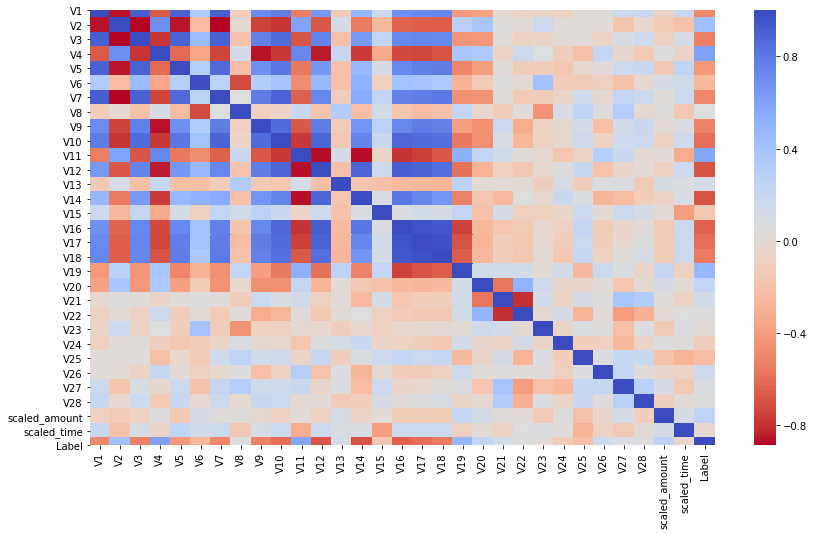

In [495]:
# Let's check the correlation matrix of the new data
plt.figure(figsize = (14, 8))
sample_corr = df_new.corr()
sns.heatmap(sample_corr, cmap="coolwarm_r")

In [496]:
sample_corr["Label"].sort_values(ascending=False)

Label            1.000000
V4               0.603884
V11              0.581536
V19              0.470215
V2               0.424865
scaled_amount    0.253289
V20              0.227344
V26              0.153749
V21              0.136471
V13              0.118364
V27              0.085584
V22              0.065819
V8               0.059957
V28              0.054711
V23              0.022640
scaled_time     -0.009364
V24             -0.106625
V15             -0.159898
V25             -0.217886
V6              -0.253195
V5              -0.415645
V1              -0.494633
V7              -0.495238
V9              -0.515148
V3              -0.524793
V18             -0.540475
V10             -0.593184
V17             -0.594941
V16             -0.642050
V14             -0.687667
V12             -0.688049
Name: Label, dtype: float64

In [497]:
# Extract important feature by its absolute value
abs(sample_corr["Label"]).sort_values(ascending=False)

Label            1.000000
V12              0.688049
V14              0.687667
V16              0.642050
V4               0.603884
V17              0.594941
V10              0.593184
V11              0.581536
V18              0.540475
V3               0.524793
V9               0.515148
V7               0.495238
V1               0.494633
V19              0.470215
V2               0.424865
V5               0.415645
scaled_amount    0.253289
V6               0.253195
V20              0.227344
V25              0.217886
V15              0.159898
V26              0.153749
V21              0.136471
V13              0.118364
V24              0.106625
V27              0.085584
V22              0.065819
V8               0.059957
V28              0.054711
V23              0.022640
scaled_time      0.009364
Name: Label, dtype: float64

- Important features to predict label class: V12, V14, 16, V4 (p > 0.6)
- Let's check the distribution and box plot of these variables to see if there are any outliers

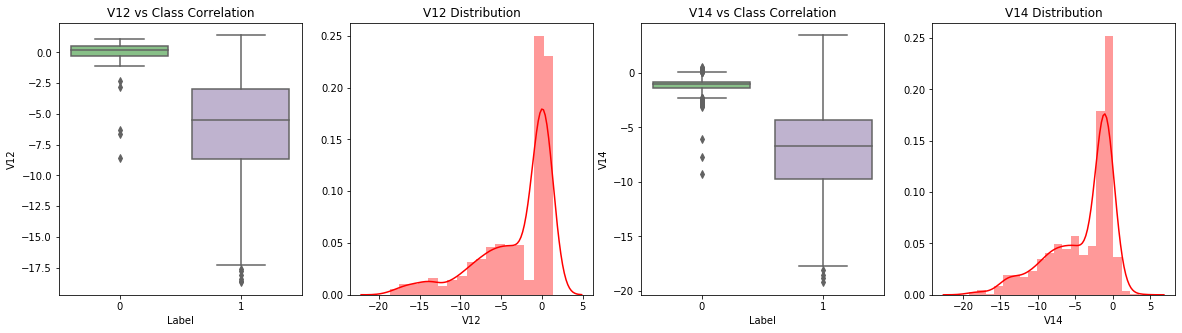

In [498]:
# Create 2 subplots (2 for boxplots, 2 for distribution plots)
f, axes = plt.subplots(ncols=4, figsize=(20,5))
colors = "Accent"

# V12 - Boxplot
sns.boxplot(x="Label", y="V12", data=df_new, palette=colors, ax=axes[0])
axes[0].set_title('V12 vs Class Correlation')

#V12 - Distribution Plot
sns.distplot( df_new["V12"], ax = axes[1], color = 'r')
axes[1].set_title('V12 Distribution')
#sns.distplot(amount_arr, color = 'r')

# V14 - Boxplot
sns.boxplot(x="Label", y="V14", data=df_new, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class Correlation')

#V14 - Distribution Plot
sns.distplot( df_new["V14"], ax = axes[3], color = 'r')
axes[3].set_title('V14 Distribution')
#sns.distplot(amount_arr, color = 'r')
plt.show()

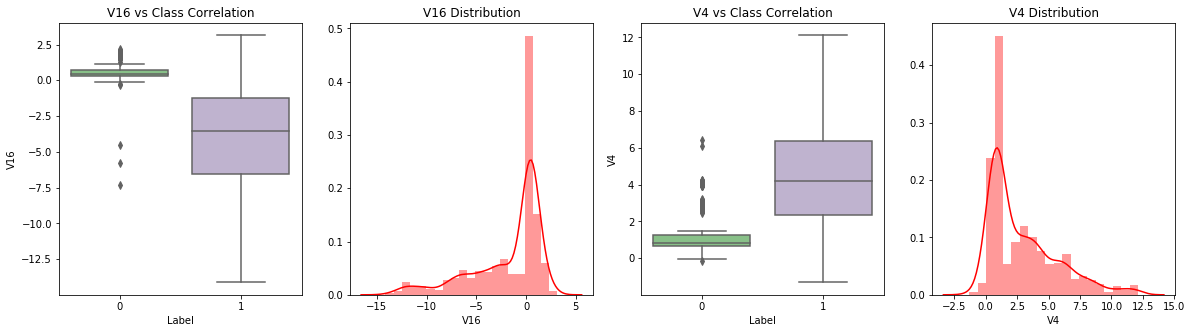

In [499]:
# Create 2 subplots (2 for boxplots, 2 for distribution plots)
f, axes = plt.subplots(ncols=4, figsize=(20,5))
colors = "Accent"

# V16 - Boxplot
sns.boxplot(x="Label", y="V16", data=df_new, palette=colors, ax=axes[0])
axes[0].set_title('V16 vs Class Correlation')

#V16 - Distribution Plot
sns.distplot( df_new["V16"], ax = axes[1], color = 'r')
axes[1].set_title('V16 Distribution')
#sns.distplot(amount_arr, color = 'r')

# V4 - Boxplot
sns.boxplot(x="Label", y="V4", data=df_new, palette=colors, ax=axes[2])
axes[2].set_title('V4 vs Class Correlation')

#V4 - Distribution Plot
sns.distplot( df_new["V4"], ax = axes[3], color = 'r')
axes[3].set_title('V4 Distribution')
#sns.distplot(amount_arr, color = 'r')
plt.show()

In [501]:
# Let's try to remove outliers using IQR

#find upper and lower range for each variable
v14_1 = df_new['V14'].loc[df_new['Label'] == 1]
q25, q75 = np.percentile(v14_1, 25), np.percentile(v14_1, 75)

v14_cut_off = (q75 - q25) * 1.5
v14_low = q25 - v14_cut_off 
v14_high = q75 + v14_cut_off

print(f"Cut off range for v14:  [{v14_low} to {v14_high}]")
# Find outliers
v14_outlier = [x for x in v14_1 if x < v14_low or x > v14_high]
# Number of outliers for fraud case of v14:
df_new.drop(df_new[(df_new['V14'] < v14_low) | (df_new['V14'] > v14_high)].index, inplace = True)

print(f"Number of outliers for fraud case of v14: {len(v14_outlier)}")
print(f"Number of samples after drop: {len(df_new)}")
print("----"*29)

#find upper and lower range for each variable
v12_1 = df_new['V12'].loc[df_new['Label'] == 1]
q25, q75 = np.percentile(v12_1, 25), np.percentile(v12_1, 75)

v12_cut_off = (q75 - q25) * 1.5
v12_low = q25 - v12_cut_off 
v12_high = q75 + v12_cut_off

print(f"Cut off range for v12:  [{v12_low} to {v12_high}]")
# Find outliers
v12_outlier = [x for x in v12_1 if x < v12_low or x > v12_high]
# Number of outliers for fraud case of v12:
df_new.drop(df_new[(df_new['V12'] < v12_low) | (df_new['V12'] > v12_high)].index, inplace = True)

print(f"Number of outliers for fraud case of v12: {len(v12_outlier)}")
print(f"Number of samples after drop: {len(df_new)}")
print("----"*29)

#find upper and lower range for each variable
v16_1 = df_new['V16'].loc[df_new['Label'] == 1]
q25, q75 = np.percentile(v16_1, 25), np.percentile(v16_1, 75)

v16_cut_off = (q75 - q25) * 1.5
v16_low = q25 - v16_cut_off 
v16_high = q75 + v16_cut_off

print(f"Cut off range for v16:  [{v16_low} to {v16_high}]")
# Find outliers
v16_outlier = [x for x in v16_1 if x < v16_low or x > v16_high]
# Number of outliers for fraud case of v16:
df_new.drop(df_new[(df_new['V16'] < v16_low) | (df_new['V16'] > v16_high)].index, inplace = True)

print(f"Number of outliers for fraud case of v12: {len(v16_outlier)}")
print(f"Number of samples after drop: {len(df_new)}")
print("----"*29)


#find upper and lower range for each variable
v4_1 = df_new['V4'].loc[df_new['Label'] == 1]
q25, q75 = np.percentile(v4_1, 25), np.percentile(v4_1, 75)

v4_cut_off = (q75 - q25) * 1.5
v4_low = q25 - v4_cut_off 
v4_high = q75 + v4_cut_off

print(f"Cut off range for v4:  [{v4_low} to {v4_high}]")
# Find outliers
v4_outlier = [x for x in v4_1 if x < v4_low or x > v4_high]
print(v4_outlier)
# Number of outliers for fraud case of v4:
df_new.drop(df_new[(df_new['V4'] < v4_low) | (df_new['V4'] > v4_high)].index, inplace = True)

print(f"Number of outliers for fraud case of v4: {len(v4_outlier)}")
print(f"Number of samples after drop: {len(df_new)}")
print("----"*29)


Cut off range for v14:  [-17.807576138200663 to 3.8320323237414122]
Number of outliers for fraud case of v14: 4
Number of samples after drop: 980
--------------------------------------------------------------------------------------------------------------------
Cut off range for v12:  [-17.3430371579634 to 5.776973384895937]
Number of outliers for fraud case of v12: 4
Number of samples after drop: 976
--------------------------------------------------------------------------------------------------------------------
Cut off range for v16:  [-14.20939879605968 to 6.644093752054304]
Number of outliers for fraud case of v12: 0
Number of samples after drop: 976
--------------------------------------------------------------------------------------------------------------------
Cut off range for v4:  [-3.568932935468553 to 12.171805988464309]
[]
Number of outliers for fraud case of v4: 0
Number of samples after drop: 976
----------------------------------------------------------------------

In [502]:
#Prepare new data to train
X = df_new.drop('Label', axis=1)
y = df_new['Label']
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [503]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter = 1000000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [510]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted'
}

for key, classifier in classifiers.items():
    # Perform cross-validation
    scores = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)
    #print(scores)
    # Calculate mean scores for each metric
    mean_accuracy = scores['test_accuracy'].mean()
    mean_precision = scores['test_precision'].mean()
    mean_recall = scores['test_recall'].mean()
    
    # Print the results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"  Accuracy: {mean_accuracy:.2f}")
    print(f"  Precision: {mean_precision:.2f}")
    print(f"  Recall: {mean_recall:.2f}")
    print('-' * 40)

Classifier: LogisticRegression
  Accuracy: 0.95
  Precision: 0.96
  Recall: 0.95
----------------------------------------
Classifier: KNeighborsClassifier
  Accuracy: 0.95
  Precision: 0.95
  Recall: 0.95
----------------------------------------
Classifier: SVC
  Accuracy: 0.93
  Precision: 0.94
  Recall: 0.93
----------------------------------------
Classifier: RandomForestClassifier
  Accuracy: 0.96
  Precision: 0.96
  Recall: 0.96
----------------------------------------


In [511]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

for key, classifier in classifiers.items():
    # Train the classifier on the entire training set
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the classifier on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print the results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"  Test Accuracy: {accuracy:.2f}")
    print(f"  Test Precision: {precision:.2f}")
    print(f"  Test Recall: {recall:.2f}")
    print('-' * 40)

Classifier: LogisticRegression
  Test Accuracy: 0.90
  Test Precision: 0.91
  Test Recall: 0.90
----------------------------------------
Classifier: KNeighborsClassifier
  Test Accuracy: 0.91
  Test Precision: 0.92
  Test Recall: 0.91
----------------------------------------
Classifier: SVC
  Test Accuracy: 0.92
  Test Precision: 0.93
  Test Recall: 0.92
----------------------------------------
Classifier: RandomForestClassifier
  Test Accuracy: 0.95
  Test Precision: 0.96
  Test Recall: 0.95
----------------------------------------


- We achive really high Test score for RandomForest Classifer !